In [24]:
# !pip install gym-super-mario-bros

In [25]:
# !pip install -U gym==0.21.0

In [26]:
import gym
import math
import random
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from collections import namedtuple, deque
from tqdm import trange
from itertools import count
from PIL import Image

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision.transforms as T
from nes_py.wrappers import JoypadSpace

from IPython import display as ipythondisplay
from pyvirtualdisplay import Display

In [27]:
gym.__version__

'0.26.0'

### Test it gym_super_mario_bros environment
It requires to use gym environment version : 0.21.0

In [28]:
from nes_py.wrappers import JoypadSpace
# Super Mario environment for OpenAI Gym
import gym_super_mario_bros
from gym_super_mario_bros.actions import SIMPLE_MOVEMENT,COMPLEX_MOVEMENT 
# env = gym_super_mario_bros.make('SuperMarioBros-v0')
env = gym_super_mario_bros.make("SuperMarioBros-1-1-v0", render_mode='human', apply_api_compatibility=True)
env = JoypadSpace(env, SIMPLE_MOVEMENT)

done = True
for step in range(1000):
    if done:
        next_state = env.reset()
    next_state, reward, done,_, info = env.step(env.action_space.sample())
    env.render()
    # img=env.render(mode="rgb_array")
    
env.close()
print('Done')

(240, 256, 3)
(240, 256, 3)
(240, 256, 3)
(240, 256, 3)
(240, 256, 3)
(240, 256, 3)
(240, 256, 3)
(240, 256, 3)
(240, 256, 3)
(240, 256, 3)
(240, 256, 3)
(240, 256, 3)
(240, 256, 3)
(240, 256, 3)
(240, 256, 3)
(240, 256, 3)
(240, 256, 3)
(240, 256, 3)
(240, 256, 3)
(240, 256, 3)
(240, 256, 3)
(240, 256, 3)
(240, 256, 3)
(240, 256, 3)
(240, 256, 3)
(240, 256, 3)
(240, 256, 3)
(240, 256, 3)
(240, 256, 3)
(240, 256, 3)
(240, 256, 3)
(240, 256, 3)
(240, 256, 3)
(240, 256, 3)
(240, 256, 3)
(240, 256, 3)
(240, 256, 3)
(240, 256, 3)
(240, 256, 3)
(240, 256, 3)
(240, 256, 3)
(240, 256, 3)
(240, 256, 3)
(240, 256, 3)
(240, 256, 3)
(240, 256, 3)
(240, 256, 3)
(240, 256, 3)
(240, 256, 3)
(240, 256, 3)
(240, 256, 3)
(240, 256, 3)
(240, 256, 3)
(240, 256, 3)
(240, 256, 3)
(240, 256, 3)
(240, 256, 3)
(240, 256, 3)
(240, 256, 3)
(240, 256, 3)
(240, 256, 3)
(240, 256, 3)
(240, 256, 3)
(240, 256, 3)
(240, 256, 3)
(240, 256, 3)
(240, 256, 3)
(240, 256, 3)
(240, 256, 3)
(240, 256, 3)
(240, 256, 3)
(240, 

KeyboardInterrupt: 

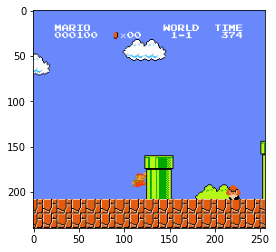

In [8]:
import matplotlib.pyplot as plt
from IPython import display
from nes_py.wrappers import JoypadSpace
# Super Mario environment for OpenAI Gym
import gym_super_mario_bros
from gym_super_mario_bros.actions import SIMPLE_MOVEMENT,COMPLEX_MOVEMENT 
# env = gym_super_mario_bros.make('SuperMarioBros-v0')
env = gym_super_mario_bros.make("SuperMarioBros-1-1-v0", render_mode='rgb_array', apply_api_compatibility=True)
env = JoypadSpace(env, SIMPLE_MOVEMENT)

done = True
for step in range(1000):
    if done:
        next_state = env.reset()
    next_state, reward, done, _, info = env.step(env.action_space.sample())
    env.render()
    if step % 100 == 0:
        plt.imshow(next_state)
        display.display(plt.gcf())    
        display.clear_output(wait=True)
    
env.close()
print('Done')

In [ ]:
# import gym
# import random
# import time
# from nes_py.wrappers import JoypadSpace
# # Super Mario environment for OpenAI Gym
# import gym_super_mario_bros
# from gym_super_mario_bros.actions import SIMPLE_MOVEMENT,COMPLEX_MOVEMENT,RIGHT_ONLY 
# env = gym_super_mario_bros.make("SuperMarioBros-1-1-v1", render_mode='human', apply_api_compatibility=True)
# env = JoypadSpace(env, RIGHT_ONLY)
# height, width, channels = env.observation_space.shape
# # actions = env.action_space.n
# # env.unwrapped.get_action_meanings()
# episodes = 5
# for episode in range(1, episodes+1):
#    next_state = env.reset()
#    done = False
#    score = 0 
#    while not done:
#       next_state, reward, done,_, info = env.step(env.action_space.sample())    
#       score += reward
# print('Episode:{} Score:{}'.format(episode, score))
# env.close()

c:\Python3.10.4\lib\site-packages\gym\envs\registration.py:555: UserWarning: WARN: The environment SuperMarioBros-1-1-v1 is out of date. You should consider upgrading to version `v3`.
  logger.warn(


Episode:5 Score:267.0


### $\epsilon$ decay schedule

### Replay bufferm

### DQN 

In [ ]:
# class CNNDQN(nn.Module):
#     def __init__(self, input_shape, num_actions):
#         super(CNNDQN, self).__init__()
#         self._input_shape = input_shape
#         self._num_actions = num_actions

#         self.features = nn.Sequential(
#             nn.Conv2d(input_shape[0], 32, kernel_size=8, stride=4),
#             nn.ReLU(),
#             nn.Conv2d(32, 64, kernel_size=4, stride=2),
#             nn.ReLU(),
#             nn.Conv2d(64, 64, kernel_size=3, stride=1),
#             nn.ReLU())

#         self.fc = nn.Sequential(
#             nn.Linear(self.feature_size, 512),
#             nn.ReLU(),
#             nn.Linear(512, num_actions))

#     def forward(self, x):
#         x = self.features(x).view(x.size()[0], -1)
#         return self.fc(x)

#     @property
#     def feature_size(self):
#         x = self.features(torch.zeros(1, *self._input_shape))
#         return x.view(1, -1).size(1)

#     def act(self, state, epsilon, device):
#         if random.random() > epsilon:
#             state = torch.FloatTensor(np.float32(state)).unsqueeze(0).to(device)
#             q_value = self.forward(state)
#             action = q_value.max(1)[1].item()
#         else:
#             action = random.randrange(self._num_actions)
#         return action

### Create gym_super_mario_bros environment, prepare DQN for training

Next we set up a gym environment for the cartpole simulation, create a DQN model with Adam optimization, and create a replay buffer of length 1000.

In [ ]:
env = gym_super_mario_bros.make('SuperMarioBros-v0')
env = JoypadSpace(env, SIMPLE_MOVEMENT)
env.reset()
next_state, reward, done, info = env.step(action=0)
print(f"{next_state.shape},\n {reward},\n {done},\n {info}")

# if gpu is to be used
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

(240, 256, 3),
 0.0,
 False,
 {'coins': 0, 'flag_get': False, 'life': 2, 'score': 0, 'stage': 1, 'status': 'small', 'time': 400, 'world': 1, 'x_pos': 40, 'y_pos': 79}


device(type='cpu')

: 

### Preprocess Environment

### Training step

### Plot rewards and losses

### Training loop

### Train!

### Play in the simulation